In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df1 = pd.read_csv('/content/drive/MyDrive/PBL Bitlabs/Employee_Dataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/PBL Bitlabs/Timesheet_Dataset.csv')

print(df1.info())
print(df2.info())
print(df1.head())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   employe_id     177 non-null    int64  
 1   branch_id      177 non-null    int64  
 2   salary         177 non-null    int64  
 3   join_date      177 non-null    object 
 4   resign_date    39 non-null     object 
 5   salary_scaled  177 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 8.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39714 entries, 0 to 39713
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timesheet_id  39714 non-null  int64 
 1   employee_id   39714 non-null  int64 
 2   date          39714 non-null  object
 3   checkin       39714 non-null  object
 4   checkout      39714 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.5+ MB
None
   employe_id  branc

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df1.head(5)

,employe_id,branch_id,salary,join_date,resign_date,salary_scaled
0,22,1,8000000,2019-01-21,NaN,31.58
1,9900,1,8000000,2019-09-16,NaN,31.58
2,173827,1,8000000,2020-06-02,NaN,31.58
3,285454,1,8000000,2020-10-14,NaN,31.58
4,40,2590,8000000,2019-02-04,NaN,31.58


In [22]:
df2.head(5)

,timesheet_id,employee_id,date,checkin,checkout
0,43154461,1,2020-04-22,9:16:50,17:27:07
1,25565087,1,2019-10-04,8:42:00,17:48:00
2,45358212,1,2020-05-13,9:00:00,19:53:00
3,42546938,1,2020-04-16,10:13:07,17:41:56
4,30273315,1,2019-12-04,12:00:05,18:02:12


In [23]:
df3 = pd.merge(df1, df2, left_on='employe_id', right_on='employee_id', how='inner')

df3.head()

,employe_id,branch_id,salary,join_date,resign_date,salary_scaled,timesheet_id,employee_id,date,checkin,checkout
0,22,1,8000000,2019-01-21,NaN,31.58,26252261,22,2019-10-08,9:42:39,18:05:43
1,22,1,8000000,2019-01-21,NaN,31.58,23907447,22,2019-08-23,8:55:59,17:59:43
2,22,1,8000000,2019-01-21,NaN,31.58,24609407,22,2019-09-13,9:28:35,18:13:52
3,22,1,8000000,2019-01-21,NaN,31.58,32846892,22,2020-01-08,8:56:11,18:27:16
4,22,1,8000000,2019-01-21,NaN,31.58,39439339,22,2020-03-16,9:02:46,18:05:00


In [24]:
# Mengonversi kolom waktu menjadi format datetime
df3['date'] = pd.to_datetime(df3['date'])
df3['checkin'] = pd.to_datetime(df3['checkin'], format='%H:%M:%S').dt.time
df3['checkout'] = pd.to_datetime(df3['checkout'], format='%H:%M:%S').dt.time

In [25]:
# Menghitung total jam kerja per hari
def calculate_work_hours(row):
    checkin = pd.Timestamp.combine(row['date'], row['checkin'])
    checkout = pd.Timestamp.combine(row['date'], row['checkout'])
    return (checkout - checkin).total_seconds() / 3600

df3['work_hours'] = df3.apply(calculate_work_hours, axis=1)
df3['month'] = df3['date'].dt.to_period('M')

In [26]:
branch_monthly_salary = df3.groupby(['branch_id', 'month'])['salary'].sum().reset_index()
branch_monthly_salary.rename(columns={'salary': 'total_salary'}, inplace=True)

In [27]:
# Menghitung total gaji per karyawan per cabang dan bulan
employee_monthly_salary = df3.groupby(['employee_id', 'branch_id', 'month']) ['salary'].sum().reset_index()
employee_monthly_salary.rename(columns={'salary': 'total_salary'}, inplace=True)

# Menghitung total jam kerja per karyawan per cabang dan bulan
employee_monthly_hours = df3.groupby(['employee_id', 'branch_id', 'month']) ['work_hours'].sum().reset_index()
employee_monthly_hours.rename (columns={'work_hours': 'total_work_hours'}, inplace=True)

# Menggabungkan DataFrame untuk total gaji dan jam kerja
employee_monthly_summary = pd.merge(employee_monthly_salary, employee_monthly_hours, on=['employee_id', 'branch_id', 'month'])

# Menghitung gaji per jam
employee_monthly_summary['salary_per_hour'] = (
employee_monthly_summary['total_salary']/
employee_monthly_summary['total_work_hours']
)

# Menghitung total gaji per cabang per bulan
branch_monthly_salary = df3.groupby (['branch_id', 'month']) ['salary'].sum().reset_index()
branch_monthly_salary.rename(columns={'salary': 'total_salary'}, inplace=True)

# Menghitung total jam kerja per cabang per bulan
branch_monthly_hours = df3.groupby(['branch_id', 'month']) ['work_hours'].sum().reset_index()
branch_monthly_hours.rename(columns={'work_hours': 'total_work_hours'}, inplace=True)

# Menggabungkan data total gaji dan jam kerja
branch_monthly_summary= pd.merge(branch_monthly_salary, branch_monthly_hours, on=['branch_id', 'month'])

# Menghitung gaji per jam
branch_monthly_summary['salary_per_hour'] = (
  branch_monthly_summary['total_salary'] /
  branch_monthly_summary['total_work_hours']
)

In [28]:
print(branch_monthly_summary.dtypes)


branch_id               int64
month               period[M]
total_salary            int64
total_work_hours      float64
salary_per_hour       float64
dtype: object


In [29]:
print(branch_monthly_summary['salary_per_hour'].isnull().sum())  # Mengecek jumlah nilai NaN
print(branch_monthly_summary['salary_per_hour'].shape)  # Mengecek ukuran kolom


0
(239,)


In [30]:
print(branch_monthly_summary['salary_per_hour'].shape)  # Mengecek jumlah elemen setelah pembersihan


(239,)


In [31]:
print(branch_monthly_summary)

     branch_id    month  total_salary  total_work_hours  salary_per_hour
0            1  2019-08     150500000        127.366667     1.181628e+06
1            1  2019-09    1691000000       1600.956389     1.056244e+06
2            1  2019-10    6675000000       6149.180000     1.085511e+06
3            1  2019-11    6172500000       5863.666667     1.052669e+06
4            1  2019-12    5603000000       5577.834167     1.004512e+06
..         ...      ...           ...               ...              ...
234      12722  2020-08     133000000        173.709722     7.656451e+05
235      12722  2020-09     154000000        198.830278     7.745299e+05
236      12722  2020-10     154000000        198.147222     7.771999e+05
237      12722  2020-11     119000000        146.807500     8.105853e+05
238      12722  2020-12      91000000         97.573056     9.326345e+05

[239 rows x 5 columns]


In [32]:
print(branch_monthly_summary.dtypes)


branch_id               int64
month               period[M]
total_salary            int64
total_work_hours      float64
salary_per_hour       float64
dtype: object


In [33]:
print(branch_monthly_summary.head())


   branch_id    month  total_salary  total_work_hours  salary_per_hour
0          1  2019-08     150500000        127.366667     1.181628e+06
1          1  2019-09    1691000000       1600.956389     1.056244e+06
2          1  2019-10    6675000000       6149.180000     1.085511e+06
3          1  2019-11    6172500000       5863.666667     1.052669e+06
4          1  2019-12    5603000000       5577.834167     1.004512e+06


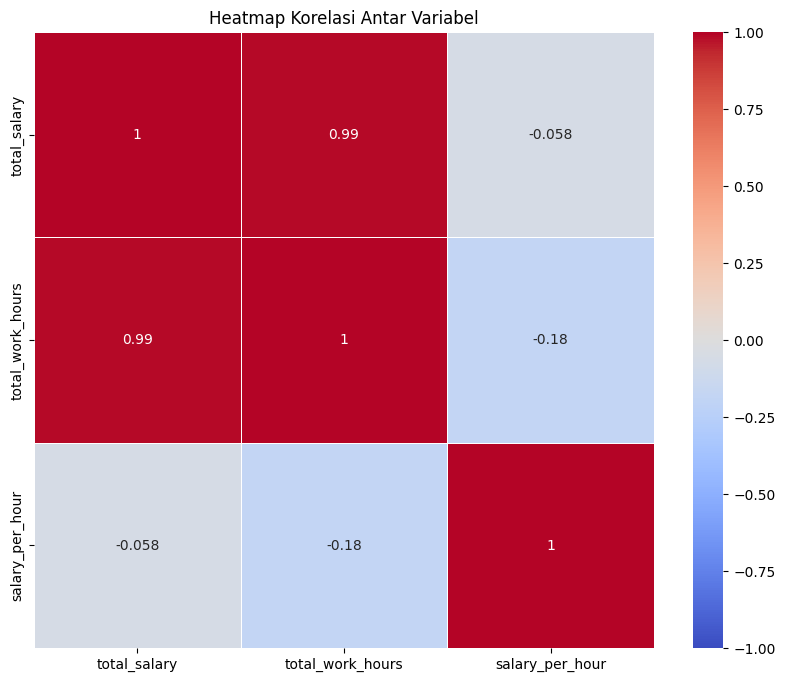

In [34]:
# Visualisasi Heatmap Korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = branch_monthly_summary[['total_salary', 'total_work_hours', 'salary_per_hour']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


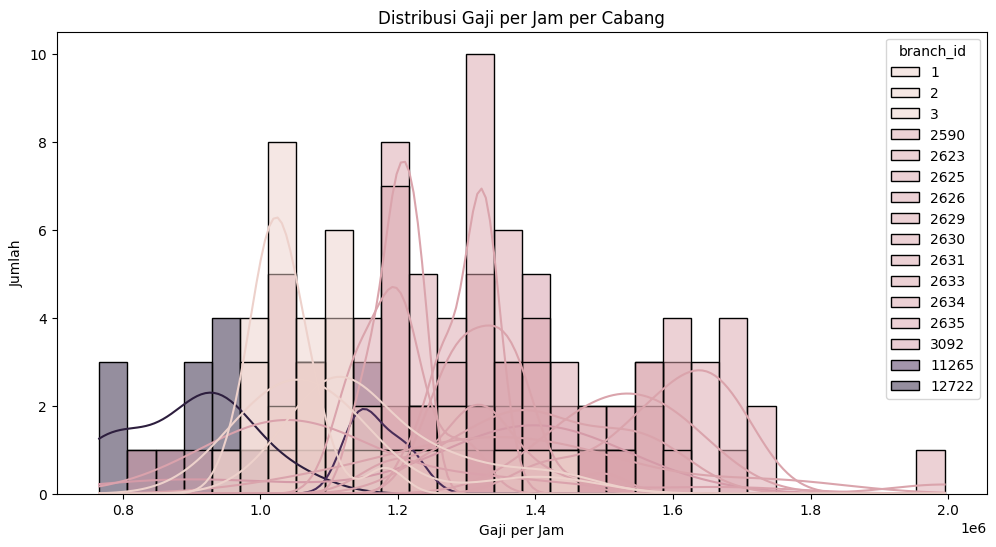

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(data=branch_monthly_summary, x='salary_per_hour', hue='branch_id', kde=True, bins=30)
plt.title('Distribusi Gaji per Jam per Cabang')
plt.xlabel('Gaji per Jam')
plt.ylabel('Jumlah')
plt.show()


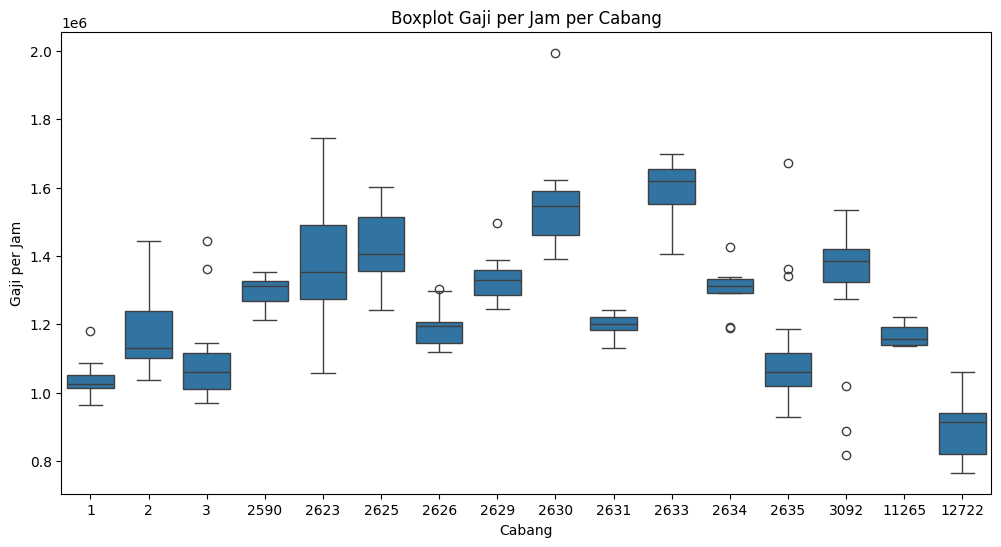

In [36]:
# Boxplot Gaji per Jam per Cabang
plt.figure(figsize=(12, 6))
sns.boxplot(data=branch_monthly_summary, x='branch_id', y='salary_per_hour')
plt.title('Boxplot Gaji per Jam per Cabang')
plt.xlabel('Cabang')
plt.ylabel('Gaji per Jam')
plt.show()

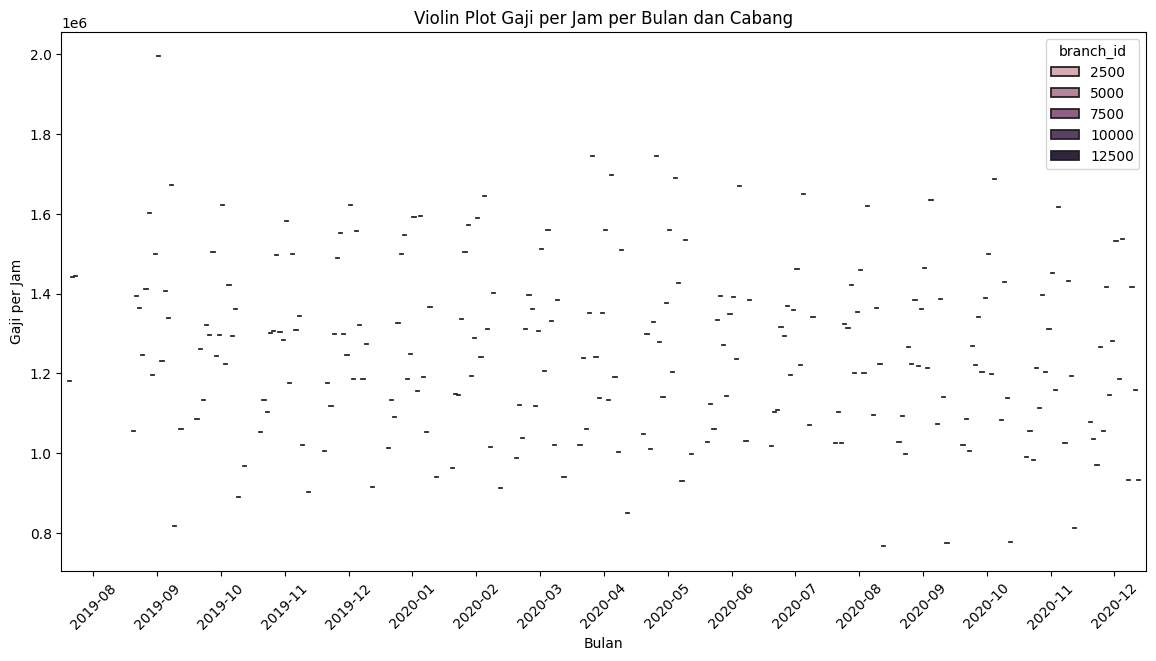

In [37]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=branch_monthly_summary, x='month', y='salary_per_hour', hue='branch_id', split=True)
plt.title('Violin Plot Gaji per Jam per Bulan dan Cabang')
plt.xlabel('Bulan')
plt.ylabel('Gaji per Jam')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-38-1273185848.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=branch_monthly_summary, x='branch_id', y='salary_per_hour', ci=None)


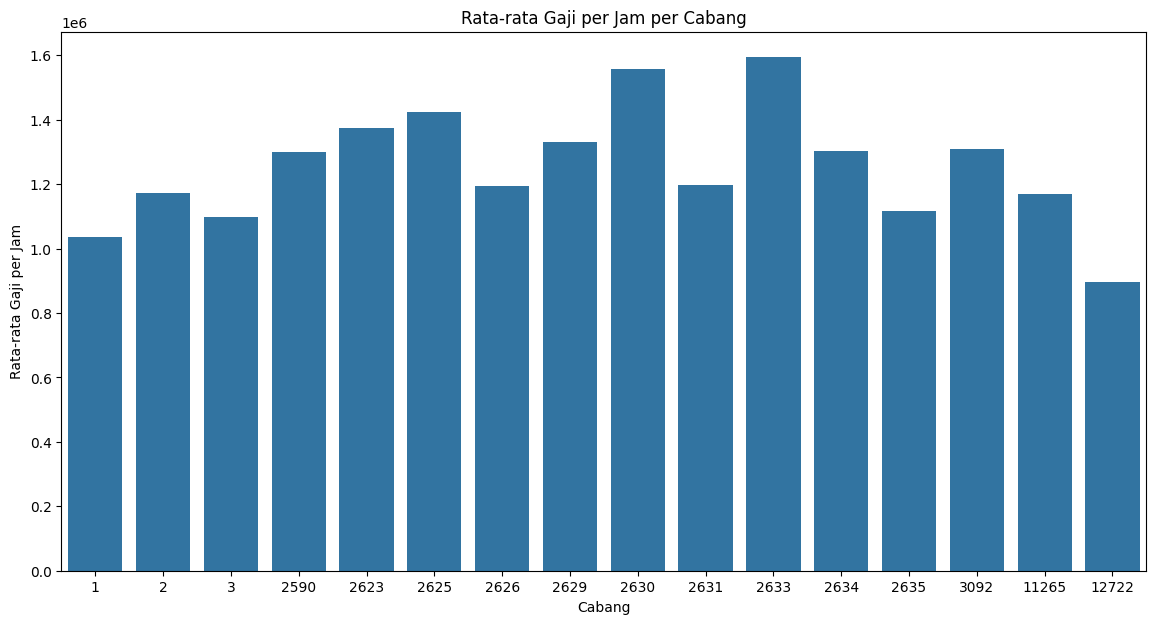

In [38]:
plt.figure(figsize=(14, 7))
sns.barplot(data=branch_monthly_summary, x='branch_id', y='salary_per_hour', ci=None)
plt.title('Rata-rata Gaji per Jam per Cabang')
plt.xlabel('Cabang')
plt.ylabel('Rata-rata Gaji per Jam')
plt.show()


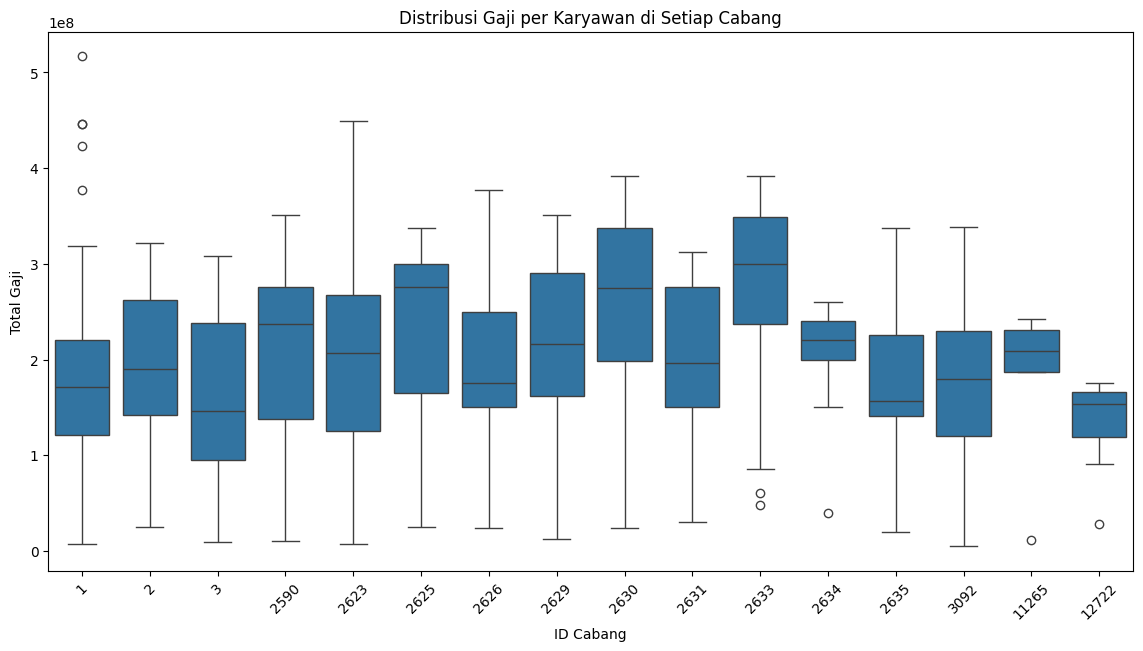

In [39]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=employee_monthly_summary, x='branch_id', y='total_salary')
plt.title('Distribusi Gaji per Karyawan di Setiap Cabang')
plt.xlabel('ID Cabang')
plt.ylabel('Total Gaji')
plt.xticks(rotation=45)
plt.show()


Koefisien Korelasi antara Jam Kerja dan Gaji per Jam: -0.18


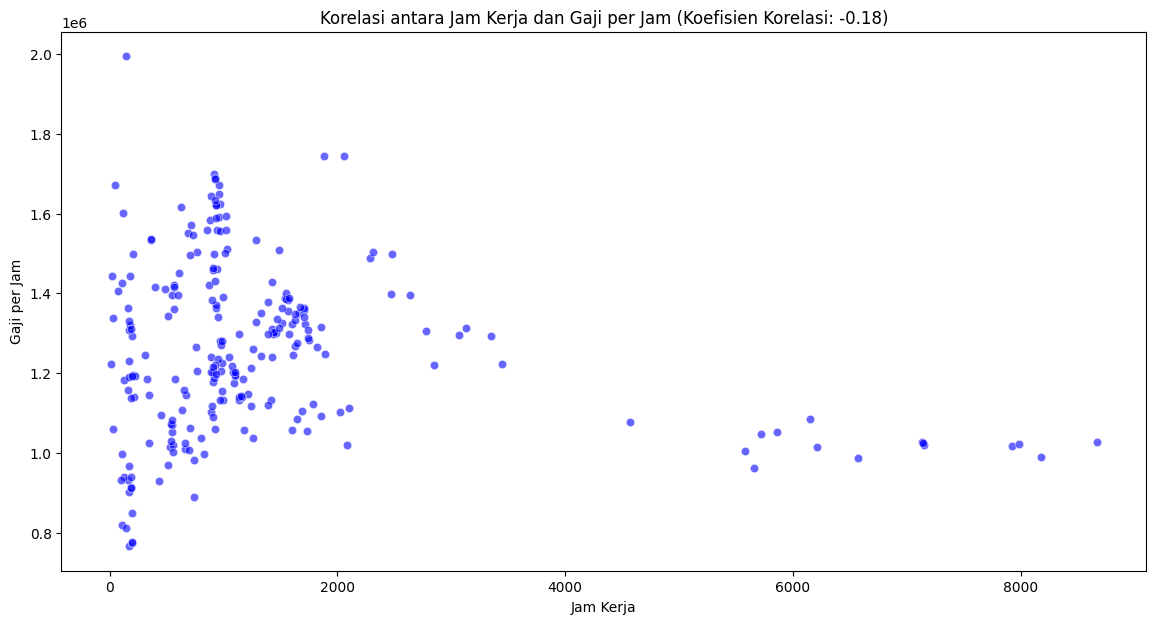

In [40]:
# Menggabungkan data total gaji dan jam kerja per cabang per bulan
branch_monthly_summary = pd.merge(branch_monthly_salary, branch_monthly_hours, on=['branch_id', 'month'])

# Menghitung gaji per jam
branch_monthly_summary['salary_per_hour'] = branch_monthly_summary['total_salary'] / branch_monthly_summary['total_work_hours']

# Menghitung koefisien korelasi antara 'total_work_hours' dan 'salary_per_hour'
correlation = branch_monthly_summary[['total_work_hours', 'salary_per_hour']].corr().iloc[0, 1]
print(f'Koefisien Korelasi antara Jam Kerja dan Gaji per Jam: {correlation:.2f}')

# Membuat scatter plot dengan titik berwarna biru
plt.figure(figsize=(14, 7))
sns.scatterplot(data=branch_monthly_summary, x='total_work_hours', y='salary_per_hour', color='blue', alpha=0.6)
plt.title(f'Korelasi antara Jam Kerja dan Gaji per Jam (Koefisien Korelasi: {correlation:.2f})')
plt.xlabel('Jam Kerja')
plt.ylabel('Gaji per Jam')
plt.show()
